# Amazon Reviews of Digital Video Downloads

In [1]:
import pandas as pd

In [2]:
movie_reviews = pd.read_parquet('../data/review_data')
movie_reviews.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,product_category
0,US,42778291,R36DE7C83302X,B0034GY4L8,652273641,Big Eden,4,1,1,N,Y,big eden,I liked this video and it appears that everyon...,2012-06-29,2012,Digital_Video_Download
1,US,51900780,R264BJL39GBDF8,B00FJTYDKK,255137298,The Croods,3,0,2,N,Y,3-stars only because of Nicolas Cage,"Cast is awesome, but seriously...I can't stand...",2014-04-09,2014,Digital_Video_Download
2,US,50549774,RZ43SQJAS1IV6,B006MW3V6U,682981764,Downton Abbey Season 2,5,0,0,N,Y,Season 2 Downton Abby,The purchase and viewing process for the Fire ...,2012-06-29,2012,Digital_Video_Download
3,US,13886817,R2WP035BBNAQBZ,B00I3MNJZ0,47146773,The After,1,1,2,N,N,Way too long and obvious,So this is after the RAPTURE? After some EVENT...,2014-04-09,2014,Digital_Video_Download
4,US,51177115,R2HRSJ5OWRLKKF,B006LZSF8M,175214460,Vegucated,5,2,3,N,Y,"A disturbing but ""gentle"" view on why be a veg...",I really enjoyed this film. I was a pesco-ovo-...,2012-06-29,2012,Digital_Video_Download


In [3]:
# Look at some reviews
descriptive_columns = ["product_title", "star_rating", "review_headline", "review_body"]
sample = movie_reviews.sample(3)
sample[descriptive_columns]

,product_title,star_rating,review_headline,review_body
3025764,"Orphan Black, Season 2",4,Four Stars,Very intricate story. If you blink you'll miss...
494460,Downton Abbey Season 4,1,Disappointing,"I love this show, but am terribly disappointed..."
3492096,The Book Thief,5,Lovely Story,"Beautiful story, thoughtfully told. Acting so ..."


## Customer reviews

In [4]:
# How many reviews has each customer given
movie_reviews.value_counts("customer_id")

customer_id
43430756    2823
39122522     753
30160665     647
50605810     614
20052283     585
            ... 
28135718       1
28135690       1
28135643       1
2813561        1
9999994        1
Length: 2083406, dtype: int64

In [5]:
# Lets take a look at reviews by the number one reviewer of movies
is_review_by_no1_reviewer = movie_reviews["customer_id"] == "43430756"
no1_reviews = movie_reviews[is_review_by_no1_reviewer]
no1_reviews[descriptive_columns].sort_values("star_rating", ascending=False)

,product_title,star_rating,review_headline,review_body
2598379,Pawn Shop Chronicles,5,SALVATION COMES IN MANY FORMS,Alton (Vincent D'Onofrio) runs a pawn shop in ...
4167084,Rosie Huntington-Whiteley & Abbey Lee on the f...,5,SURVIVE,"In the future, the world is an industrialized ..."
1595837,Mad Max: Fury Road - Trailer 2,5,"OUT HERE, EVERYTHING HURTS","In the future, the world is an industrialized ..."
1595967,Pitch Perfect 2 - Clip: Emily arrives at the B...,5,THIS SHOULD NOT BE YOUR SCREEN SAVER,The sequel contains the same politically incor...
1596035,Cups (Pitch Perfect’s “When I’m Gone”),5,THIS SHOULD NOT BE YOUR SCREEN SAVER,The sequel contains the same politically incor...
...,...,...,...,...
2974604,Infernal - Trailer,1,"HUMAN, FATHER, MAN",This appears to be one of the worse &#34;Omen&...
4671789,Somebody Help Me 2,1,THEY SHOULD OF STOPPED WHEN NO ONE SAW THE FIR...,I have not seen the first movie and it might o...
4683921,Horror Of The Zombies,1,BIKINI TEASER,These are not zombies in the conventional brai...
689007,Cowboys vs. Zombies,1,I'M HERE FOR YOU,Shadroch (Michael Sharpe) is a death collector...


<AxesSubplot:>

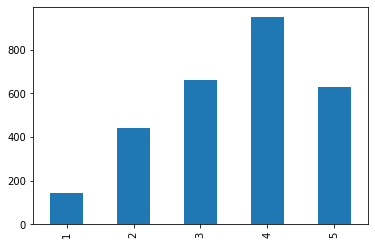

In [6]:
# What is the breakdown of their reviews
no1_reviews["star_rating"].value_counts().sort_index().plot.bar()

## Reviews across the years

<AxesSubplot:>

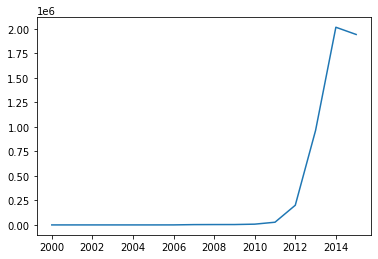

In [7]:
# The number of reviews per year
movie_reviews["year"].value_counts().sort_index().plot()

In [8]:
# Calculate the average star rating, helpful votes and total votes each year
averages_by_year = movie_reviews.groupby("year").mean()
averages_by_year

,star_rating,helpful_votes,total_votes
year,,,
2000,2.000000,0.000000,1.000000
2001,3.000000,0.000000,0.000000
2002,4.166667,0.166667,0.333333
2003,3.500000,0.000000,0.250000
2004,4.666667,0.444444,0.444444
2005,3.733333,0.266667,0.466667
2006,3.624454,5.196507,11.419214
2007,3.588046,3.097044,7.033419
2008,3.764467,2.878042,5.881287


<AxesSubplot:xlabel='year'>

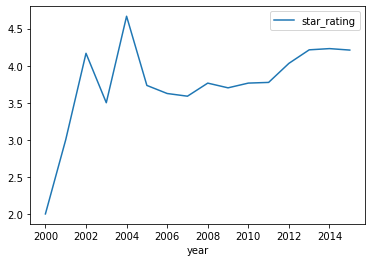

In [9]:
# Plot the star rating over time
averages_by_year.plot(y="star_rating")

## Controversial movies

In [10]:
# Lets find some controversial movies. (Those with a big standard deviation in star rating and at least 1000 reviews)
movies = movie_reviews.groupby("product_id")["star_rating"].agg(std_star_rating='std', reviews='count')

In [11]:
at_least_1000_reviews = movies["reviews"] >= 1000
movies[at_least_1000_reviews].sort_values("std_star_rating",ascending=False)

,std_star_rating,reviews
product_id,,
B00VJ04TH0,1.699101,1202
B00IIU9U00,1.677703,2532
B00H9UYCOY,1.638118,1847
B00JH49OTS,1.622425,1468
B00RNRD7Y4,1.618491,1430
...,...,...
B008LOVIIK,0.369208,1452
B00CFNUMD0,0.363222,2532
B008IBPMZG,0.359704,3358


In [12]:
movie_B00VJ04TH0 = movie_reviews["product_id"] == "B00VJ04TH0"
movie_reviews[movie_B00VJ04TH0].sample(5)[descriptive_columns]


,product_title,star_rating,review_headline,review_body
2058768,Star Wars The Digital Six film Collection,5,Five Stars,Amazing quality and stream
3030799,Star Wars The Digital Six film Collection,5,Only opinions about the digital collection: no...,High quality renditioning of the films. Playb...
4638234,Star Wars The Digital Six film Collection,1,I love Star Wars,100 dollars to be able to stream the movies?! ...
3018233,Star Wars The Digital Six film Collection,5,loved it,very happy this finally came out
4295124,Star Wars The Digital Six film Collection,5,Five Stars,Holy FingA! Way to go S. Blu rays!


In [13]:
movie_B00IIU9U00 = movie_reviews["product_id"] == "B00IIU9U00"
movie_reviews[movie_B00IIU9U00].sample(5)[descriptive_columns]


,product_title,star_rating,review_headline,review_body
3540789,Wolf Of Wall Street,1,OMG horrible - waste of time,"I agree, vulgar and disgusting... I should hav..."
4991588,Wolf Of Wall Street,5,Great movie. Its about time people wake up and...,Great movie. Its about time people wake up an...
3932289,Wolf Of Wall Street,4,This is no fable with a nice clear ending,Vulgar and shocking. This really shouldn't be ...
3940845,Wolf Of Wall Street,5,Five Stars,"great movie, didnt hold anything back"
2498705,Wolf Of Wall Street,5,A Surprise Treat of a Film,Let me first say that I am actually NOT a Mart...


In [14]:
movie_B00H9UYCOY = movie_reviews["product_id"] == "B00H9UYCOY"
movie_reviews[movie_B00H9UYCOY].sample(5)[descriptive_columns]


,product_title,star_rating,review_headline,review_body
878867,Jackass Presents: Bad Grandpa - Extended,4,Four Stars,Funny movie
3284288,Jackass Presents: Bad Grandpa - Extended,1,One Star,One star need I write more
3426153,Jackass Presents: Bad Grandpa - Extended,2,Not really any reason this film was made,Not my kind of humor. I found it typical of th...
1337652,Jackass Presents: Bad Grandpa - Extended,1,waste of time!,"Horrible. Absolutely hated it, I couldn't even..."
2173666,Jackass Presents: Bad Grandpa - Extended,5,wow,Irreverent and hilarious


## Length of reviews

In [15]:
# Lets add a column - review length
movie_reviews["review_length"] = movie_reviews["review_body"].str.len()
movie_reviews.head()["review_length"]

0     185.0
1     140.0
2     160.0
3     393.0
4    3946.0
Name: review_length, dtype: float64

In [16]:
# Whats the average length of each star rating?
length_stats_by_rating = movie_reviews.groupby("star_rating")["review_length"].describe()

length_stats_by_rating

,count,mean,std,min,25%,50%,75%,max
star_rating,,,,,,,,
1,365349.0,228.955612,441.200667,1.0,50.0,127.0,242.0,43415.0
2,251929.0,269.422512,507.876930,1.0,60.0,137.0,275.0,22163.0
3,449250.0,239.793968,473.417011,1.0,54.0,128.0,239.0,39752.0
4,984202.0,199.225339,385.147197,1.0,45.0,120.0,203.0,23269.0
5,3122921.0,157.494702,290.640618,1.0,34.0,109.0,172.0,30570.0


<AxesSubplot:xlabel='star_rating'>

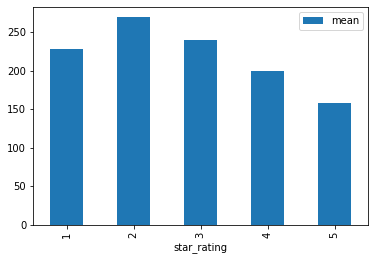

In [17]:
# Better reviews are on average shorter
length_stats_by_rating.plot.bar(y="mean")

<AxesSubplot:xlabel='star_rating'>

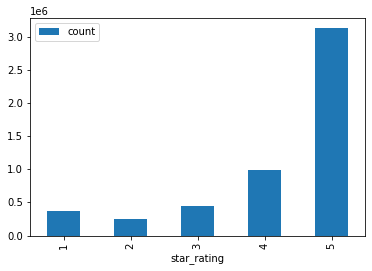

In [18]:
# Most people give 5 star reviews
length_stats_by_rating.plot.bar(y="count")